In [108]:
%matplotlib inline

# ANN with 2F

This code:
- Classifies astrophysical sources into two groups using two features and a neural network.
- Uses stratified repeated k-fold cross-validation to ensure robust evaluation.
- Collects accuracy, true positive rate, and true negative rate.
- Predicts class probabilities for unknown (unlabeled) sources (unids).
- Writes out those probabilities for downstream analysis.

Then
1. Loads unID object features and neural network prediction results.
2. Reshapes and organizes prediction probabilities by object.
3. Computes mean and standard deviation of predicted probabilities across multiple models.
4. Prepares for threshold-based classification of unIDs (based on p_cut).

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [110]:
XY_bal_log_Rel= np.genfromtxt('XY_bal_log_Rel.txt',dtype='str') 
XY_bal_log_Rel_data = np.asarray(XY_bal_log_Rel[1::,:],dtype=float)
print('Columns: ', XY_bal_log_Rel [0,:])

print('Shape of XY_bal_log_Rel_data: ', XY_bal_log_Rel_data.shape)


XY_bal_log_Rel_data_sigma0=np.zeros([0,XY_bal_log_Rel_data.shape[1]])

sigmaastro=0


for i in range (0,len(XY_bal_log_Rel_data)):
    if XY_bal_log_Rel_data[i,2]>=sigmaastro: #remeber column are 0=beta, 1=beta_err, 2=E_peak, 3=sigma, 4=curv_sign
        XY_bal_log_Rel_data_sigma0=np.concatenate( (XY_bal_log_Rel_data_sigma0, [XY_bal_log_Rel_data[i,:]] ) , axis=0)


XY_bal_log_Rel_data=XY_bal_log_Rel_data_sigma0

X_bal_log_Rel_data= XY_bal_log_Rel_data[:,[0,1]] # This selects only columns 0 and 1 (shape: (n, 2)), 
Y=XY_bal_log_Rel_data[:,4]
print('Shape of X_bal_log_Rel_data:', X_bal_log_Rel_data.shape)
print('Shape of Y: ', Y.shape)
print('10**XY_bal_log_Rel_data[:,2].min() ---- ', 10**XY_bal_log_Rel_data[:,2].min())
print('Y: ', Y)

Columns:  ['E_peak' 'beta' 'sigma' 'beta_Rel' '0,1=astro,DM']
Shape of XY_bal_log_Rel_data:  (5662, 5)
Shape of X_bal_log_Rel_data: (5662, 2)
Shape of Y:  (5662,)
10**XY_bal_log_Rel_data[:,2].min() ----  4.056
Y:  [0. 0. 0. ... 1. 1. 1.]


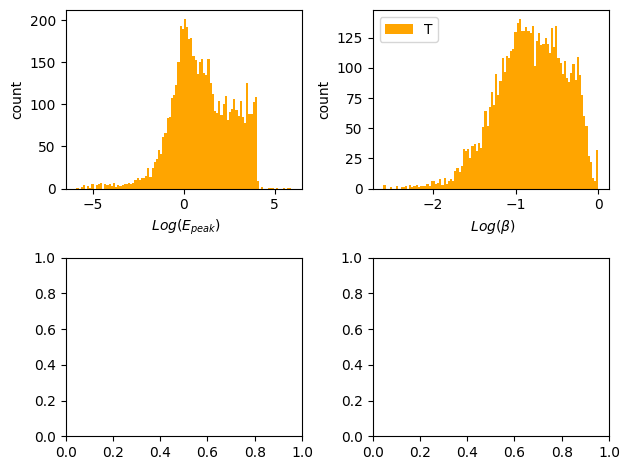

In [111]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#colors = ['red', 'tan', 'lime']
ax0.hist(X_bal_log_Rel_data[:,[0]], 100, color='orange')
#ax0.hist(DM_log_bal_Rel[:,[0]], 100, color='m')
#ax0.hist(unids_log[:,[0]], 100, color='red')
#ax0.legend(prop={'size': 10})
#ax0.set_title('Epeak distribution')
ax0.set_xlabel(r' $Log(E_{peak})$')
ax0.set_ylabel('count')

ax1.hist(X_bal_log_Rel_data[:,[1]], 100, color='orange')
#ax1.hist(DM_log_bal_Rel[:,[1]], 100, color='m')
#ax1.hist(unids_log[:,[1]], 100,color='red')
ax1.legend(('TOT: Astro+DM'))
#ax1.set_title('Beta distribution')
ax1.set_xlabel(r' $Log(\beta)$')
ax1.set_ylabel('count')

"""
ax2.hist(X_bal_log_Rel_data[:,[2]], 100, color='orange')
#ax2.hist(DM_log_bal_Rel[:,[2]], 100, color='m')
#ax2.hist(unids_log[:,[2]], 100, color='red')
#ax2.set_title('sigma distribution')
ax2.set_xlabel(r' $Log(\sigma_{TS})$')
ax2.set_ylabel('count')
"""

"""
ax3.hist(X_bal_log_Rel_data[:,[3]], 100, color='orange')
#ax3.hist(DM_log_bal_Rel[:,[3]], 100, color='m')
#ax3.hist(unids_log[:,[3]], 100, color='red')
#ax3.set_title('beta_err distribution')
ax3.set_xlabel(r' $Log(\beta_{rel})$')
ax3.set_ylabel('count')
"""

fig.tight_layout()
plt.show()

#fig.savefig("histo_tot_data_bal.pdf", bbox_inches='tight')

In [112]:
"""
print('sigma max',10**X_bal_log_Rel_data[:,2].max())
print('sigma min',10**X_bal_log_Rel_data[:,2].min())
print('log sigma max',X_bal_log_Rel_data[:,2].max())
print('log sigma min',X_bal_log_Rel_data[:,2].min())
np.log10(100)
"""

"\nprint('sigma max',10**X_bal_log_Rel_data[:,2].max())\nprint('sigma min',10**X_bal_log_Rel_data[:,2].min())\nprint('log sigma max',X_bal_log_Rel_data[:,2].max())\nprint('log sigma min',X_bal_log_Rel_data[:,2].min())\nnp.log10(100)\n"

In [113]:
# Count the number of instances in each class of the binary label vector Y (0=astro, 1=DM)
NDM_sample=0

for i in range(0,len(Y)):
       if Y[i]==1: 
        NDM_sample=NDM_sample+1

print (NDM_sample)

Nastro_sample=0

for i in range(0,len(Y)):
       if Y[i]==0: 
        Nastro_sample=Nastro_sample+1
        
print (Nastro_sample)        

2831
2831


In [114]:

X_log=X_bal_log_Rel_data

#normalizer = sklearn.preprocessing.StandardScaler()
#normalizer.fit(X_log)
#print('StandardSaler mean', normalizer.mean_)
#X_log = normalizer.transform(X_log)

#X_log = np.log10(X_log)

print(X_log.shape)
print(X_log[1:5,0])
print(X_log[1:5,1])


print(Y.shape)

(5662, 2)
[0.70814035 0.22474019 0.25731851 0.32611046]
[-1.73752546e-04 -5.81201709e-01 -5.61932550e-01 -1.10017950e+00]
(5662,)


In [115]:
# Loading and Preprocessing New Data (unids)
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


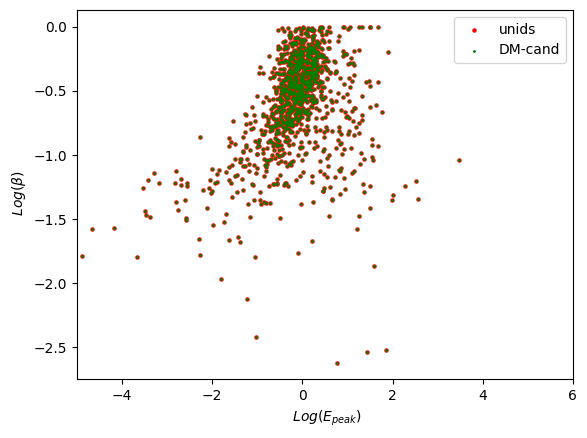

In [116]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids',s=5)
plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
          color='green',label='DM-cand',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

# ANN

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [118]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalizer = sklearn.preprocessing.StandardScaler()

N_splits=5 #25% of testing set with N_splits=4, but we lost the easy 5 statitics in each bin
N_Repeats=2
#N_sample=N_splits*N_Repeats

OA=[]
TN=[]
TP=[]
#unIDs_std_proba_check_repeated_rs_stats_all=np.array((1,))

#OA_rs_stats=open("OA_rs_stats.txt", "w")
#OA_rs_stats.write('seed_value OA \n') 
#TN_rs_stats=open("TN_rs_stats.txt", "w")
#TN_rs_stats.write('seed_value TN \n') 
#TP_rs_stats=open("TP_rs_stats.txt", "w")
#TP_rs_stats.write('seed_value TP \n') 

unids_DM_std_proba_check_repeated_kfold_2F_21=open("unids_DM_std_proba_check_repeated_kfold_2F_21.txt", "w")
unids_DM_std_proba_check_repeated_kfold_2F_21.write('Numb unids_DM_proba_check_repeated_kfold \n') 


"""
------------------------------- Setting Up Cross-Validation -----------------------------------
Splits the data into stratified folds (preserving class ratio) for better generalization
Total 10 splits (5-fold repeated 2 times)
-----------------------------------------------------------------------------------------------
"""
rskf = RepeatedStratifiedKFold(n_splits=N_splits, n_repeats=N_Repeats)
rskf.get_n_splits(X_log, Y)
print('rskf',rskf)



"""
--------------------------------------- Classifier Setup --------------------------------------
A neural net with:
        - One hidden layer of 21 neurons.
        - ReLU activation.
        - Learning rate of 0.015.
        - 1000 max iterations.
        - Adam optimizer.
        - No L2 regularization (alpha=0.0).
-----------------------------------------------------------------------------------------------
"""
ANN = MLPClassifier(solver='adam', alpha=0.0, batch_size=120, hidden_layer_sizes=(21,), 
                 learning_rate_init=0.015, max_iter=1000, random_state=None, activation='relu')



""" 
--------------------------------- Training + Evaluation Loop ----------------------------------
For each cross-validation split:
1. Train-test split based on fold.
2. Standardize the features using StandardScaler (fit on training, transform both).
3. Train the MLP (ANN.fit()).
4. Predict:
        - Binary class predictions (predict()).
        - Class probabilities (predict_proba()).
5. Collect metrics:
        - Accuracy (OA).
        - Confusion matrix:
        - TN (True Negative Rate)
        - TP (True Positive Rate
"""    
for train_index, test_index in rskf.split(X_log, Y):
        print('train_index',train_index.shape, "test_index", test_index.shape)
        X_train_split, X_test_split = X_log[train_index], X_log[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]
        normalizer.fit(X_train_split)
        X_train_split_std=normalizer.transform(X_train_split)
        X_test_split_std=normalizer.transform(X_test_split)
    
        ANN_fit=ANN.fit(X_train_split_std, Y_train_split)
        Y_test_split_01_std_check=ANN_fit.predict(X_test_split_std)
        Y_test_split_proba_std_check=ANN_fit.predict_proba(X_test_split_std)
        
        OA.extend([accuracy_score(Y_test_split, Y_test_split_01_std_check)])
        conf_matrix=sklearn.metrics.confusion_matrix(Y_test_split, Y_test_split_01_std_check, normalize='true')
        TN.extend([conf_matrix[0,0]])
        TP.extend([conf_matrix[1,1]])
        
        
        "------------------------------------ Predict on Unidentified Sources --------------------------------------"
        unids_std_check=normalizer.transform(unids_log)
        unIDs_std_proba_check_repeated_kfold=ANN_fit.predict_proba(unids_std_check)
        """ 
        For each split, the model is also applied to the unids_log dataset (unlabeled sources),  nd it writes out the probability of being class 1 for each one.
        This provides multiple predictions across different models/splits.

        This writes a file: "unids_DM_std_proba_check_repeated_kfold_2F_21.txt" which contains, for each fold/repeat:
                - Column 0: the unID index (from 0 to N_unids-1)
                - Column 1: the predicted probability of being DM-like from that fold
        """
        for i in range(0,len(unids_std_check)):
                #unIDs_std_proba_check_repeated_rs_stats_all[i]=np.append(ANN_fit.predict_proba(unids_std_check)[i,1])
                unids_DM_std_proba_check_repeated_kfold_2F_21.write('{} {} \n'.format(i, 
                                                                    unIDs_std_proba_check_repeated_kfold[i,1]))
   

       # OA_rs_stats.write('{} {} \n'.format(seed_value[j], OA[j]))
        #TN_rs_stats.write('{} {} \n'.format(seed_value[j], TN[j]))
        #TP_rs_stats.write('{} {} \n'.format(seed_value[j], TP[j]))  

    
unids_DM_std_proba_check_repeated_kfold_2F_21.close()

#OA_rs_stats.close()
#TN_rs_stats.close()
#TP_rs_stats.close()


print('X_train_split.shape', X_train_split.shape)
print('X_test_split.shape', X_test_split.shape)

#unIDs_std_proba_check_repeated_rs_stats=np.array(unIDs_std_proba_check_repeated_rs_stats)
#print('unIDs_std_proba_check_repeated_rs_stats.shape',unIDs_std_proba_check_repeated_rs_stats.shape)
#print(unIDs_std_proba_check_repeated_rs_stats[0:3,:])

OA=np.array(OA)
#OA=np.reshape(OA,(len(unids_std_check),(N_sample)))
TN=np.array(TN)
#TN=np.reshape(TN,(len(unids_std_check),(N_sample)))
TP=np.array(TP)
#TP=np.reshape(TP,(len(unids_std_check),(N_sample)))



rskf RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
X_train_split.shape (4530, 2)
X_test_split.shape (1132, 2)


In [119]:
print(OA.shape)
#print(OA)
print('OA mean', OA.mean(), 'OA std',OA.std(ddof=1))
print('TN mean', TN.mean(), 'TN std',TN.std(ddof=1))
print('TP mean', TP.mean(), 'TP std',TP.std(ddof=1))
print(unIDs_std_proba_check_repeated_kfold.shape)

(10,)
OA mean 0.862857138401754 OA std 0.00984841869951255
TN mean 0.8578224615327089 TN std 0.027296804150781055
TP mean 0.8678950025239777 TP std 0.03189597530646661
(1125, 2)


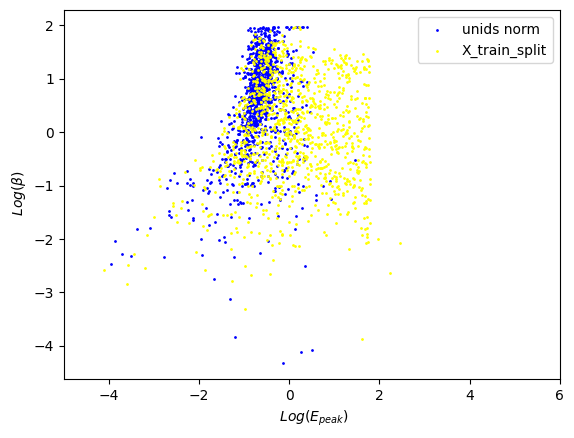

In [120]:
import matplotlib.pyplot as plt

f = plt.figure()
#plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids log',s=5)
#plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
         # color='green',label='unids lin data',s=1)
plt.scatter(unids_std_check[:,0],unids_std_check[:,1], 
          color='blue',label='unids norm',s=1)
plt.scatter(X_test_split_std[:,0],X_test_split_std[:,1], 
          color='yellow',label='X_train_split',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

In [121]:
from matplotlib.patches import Patch

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.5],
        xlim=[0, len(X_log)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

/Users/martacaninoromero/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by RepeatedStratifiedKFold
  warnings.warn(
/Users/martacaninoromero/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/Users/martacaninoromero/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


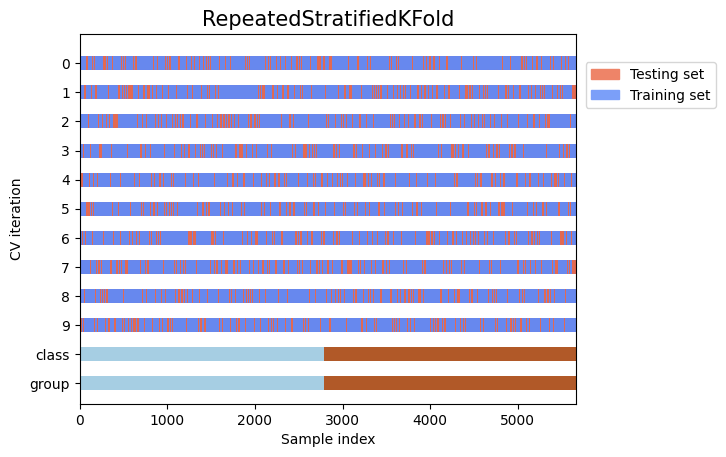

In [122]:
fig, ax = plt.subplots()
cv = rskf
plot_cv_indices(cv, X_log , Y, Y ,ax, N_splits*N_Repeats)
ax.axes
ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.2))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )

#fig.savefig("Reapeated5_Kfold5_split.pdf", bbox_inches='tight')

# unIDs classification with errors

Objective
To compute the mean and standard deviation of predicted probabilities (to be class 1 = DM-like) for each unID source, across multiple runs of the trained classifier (from the previous MLPClassifier code).

In [123]:
# Load unID source data
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


In [124]:
""" 
Load model prediction outputs
    - Loads the probabilities written during each fold of training.
    - Assumes format: [index, probability] for each unID, per split.
"""
unids_DM_std_proba_repeated_kfold= np.genfromtxt('unids_DM_std_proba_check_repeated_kfold_2F_21.txt',dtype='str') 
unids_DM_std_proba_data_repeated_kfold=np.asarray(unids_DM_std_proba_repeated_kfold[1::],dtype=float)
print(unids_DM_std_proba_data_repeated_kfold[0,:])
print(unids_DM_std_proba_data_repeated_kfold[1,:])

#N_splits=5
#N_Repeats=3

print('unids_DM_std_proba_data_repeated_kfold.shape',unids_DM_std_proba_data_repeated_kfold.shape)
print(unids_DM_std_proba_data_repeated_kfold[0,0:3])
print(unids_DM_std_proba_data_repeated_kfold[1,0:3])
print(unids_DM_std_proba_data_repeated_kfold[2,0:3])

[0.0000000e+00 4.4108836e-11]
[1.         0.51283745]
unids_DM_std_proba_data_repeated_kfold.shape (11250, 2)
[0.0000000e+00 4.4108836e-11]
[1.         0.51283745]
[2.         0.66829377]


In [125]:

#defining an array where each column is the probability to be DM for each unIDs in each split

#defining an array where each column is the probability to be DM for each unIDs in each split

""" 
Extract useful variables
      - N_unids: number of unID sources.
      - N_sample: number of times each unID was evaluated = number of folds × repeats.
"""
N_unids=unids_log.shape[0]
print('N_unids',N_unids)

#N_splits=3
#N_Repeats=10

N_sample=N_splits*N_Repeats
print('N_sample',N_sample)

print(unids_DM_std_proba_data_repeated_kfold.shape)

""" 
Reshape probability data. Purpose:
      Build a structured array where:
            - First column = unID index
            - Remaining columns = predicted probabilities across each of the N_sample splits
      This assumes the file ordering is consistent and that predictions are block-structured:
            - First N_unids rows = fold 1
            - Second N_unids rows = fold 2
            -  ...
"""
unids_number=unids_DM_std_proba_data_repeated_kfold[0:N_unids,0]

print('unids number',unids_number)
print('unids number shape',unids_number.shape)

unids_DM_std_proba_N_sample_repeated_kfold=np.zeros((N_unids,(N_sample+1)))

unids_DM_std_proba_N_sample_repeated_kfold[:,0]=unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)]=np.reshape(
unids_DM_std_proba_data_repeated_kfold[:,1],(N_unids,(N_sample)))

print('unids_DM_std_proba_N_sample_repeated_kfold.shape', 
      unids_DM_std_proba_N_sample_repeated_kfold.shape)
print(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_DM_std_proba_N_sample_repeated_kfold=np.array(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_int_prob=float((unids_DM_std_proba_N_sample_repeated_kfold[:,1].T))
#print(unids_int_prob)

N_unids 1125
N_sample 10
(11250, 2)
unids number [0.000e+00 1.000e+00 2.000e+00 ... 1.122e+03 1.123e+03 1.124e+03]
unids number shape (1125,)
unids_DM_std_proba_N_sample_repeated_kfold.shape (1125, 11)
[[0.00000000e+00 4.41088360e-11 5.12837453e-01 ... 6.25762700e-11
  4.24477413e-01 1.58174718e-02]
 [1.00000000e+00 7.83188256e-30 4.73600706e-45 ... 6.13402010e-05
  1.52472414e-37 6.03917788e-01]
 [2.00000000e+00 2.37471816e-81 4.22257715e-17 ... 2.12860015e-04
  2.68280756e-07 6.50202670e-01]
 ...
 [1.12200000e+03 8.57960676e-03 5.60885211e-01 ... 5.96461385e-01
  8.60063763e-01 4.94794078e-01]
 [1.12300000e+03 8.47033369e-02 4.09972281e-01 ... 2.70269482e-17
  8.79937658e-17 4.58860408e-01]
 [1.12400000e+03 5.71283054e-01 1.82912846e-83 ... 3.86816142e-14
  1.69901474e-49 5.19222053e-01]]


In [126]:
""" 
Compute statistics
    - unids_mean: average probability of being DM-like across all splits
    - unids_std: standard deviation of that probability — gives a measure of confidence
"""
unids_mean=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].mean(axis=1)
unids_std=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].std(axis=1,ddof=1)
print('unids_mean', unids_mean, 'unids std',unids_std)
print(unids_mean.shape)

""" 
Define Probability Thresholds
    - mean_prob ≥ 0.90 (strong candidate)
    - mean_prob ≥ 0.50 (moderate candidate)
"""
p_cut=0.90
p_cut_50=0.50

unids_mean [0.24464739 0.18515351 0.30197147 ... 0.39147938 0.27391633 0.2603759 ] unids std [0.26505488 0.26808752 0.37913526 ... 0.35093587 0.28186738 0.27887432]
(1125,)


In [127]:
import pandas as pd
df_ann = pd.DataFrame({
    'unid_idx': unids_number.astype(int),
    'ann_mean_prob': unids_mean,
    'ann_std_prob': unids_std
})

df_ann.to_csv('ann_probs_per_unid.csv', index=False)

df_ann.head()

,unid_idx,ann_mean_prob,ann_std_prob
0,0,0.244647,0.265055
1,1,0.185154,0.268088
2,2,0.301971,0.379135
3,3,0.396568,0.290201
4,4,0.352528,0.297019


In [128]:
# How many unIDs have high ANN probability?
(df_ann['ann_mean_prob'] >= 0.9).sum()

np.int64(0)

Text(0, 0.5, 'count')

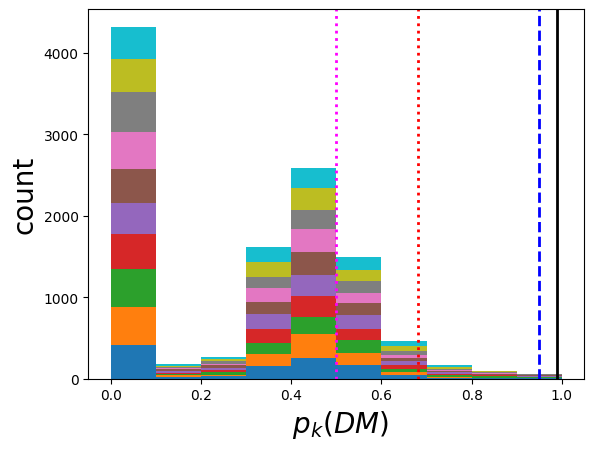

In [129]:
import matplotlib.pyplot as plt

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()
#for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold)):
counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                             bins, histtype='barstacked', density=False)
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
plt.axvline(0.68, color='red', linestyle=':', linewidth=2)
plt.axvline(0.95, color='blue', linestyle='--', linewidth=2)
plt.axvline(0.99, color='black', linestyle='-', linewidth=2)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k(DM)$',size=20)
plt.ylabel('count',size=20)

#fig.savefig("full_histo_2F.pdf", bbox_inches='tight')


In [130]:
all_color=np.asarray(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)],dtype='str')

print(all_color.shape)

for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)])):
    for j in range(0,N_sample):
        all_color[i,j]='midnightblue'

print(len(unids_log))    
print(all_color.shape)
print(all_color)

(1125, 10)
1125
(1125, 10)
[['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ...
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']]


Text(0.31622776601683794, 1, ' $NN, 2F$')

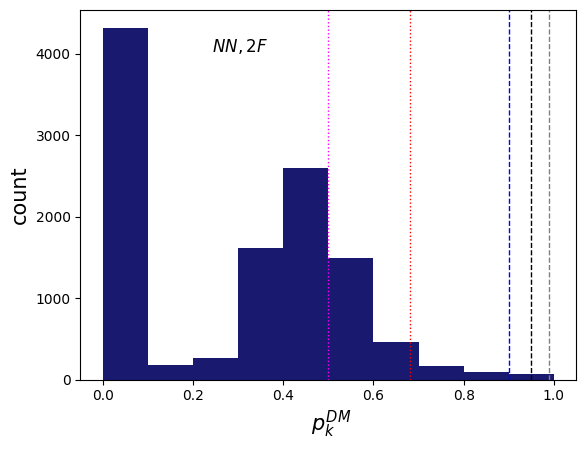

In [131]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                         bins,histtype='barstacked', density=False, color=all_color[i,:])
#plt.scatter(bins_all[:],counts_all[:])
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=1)
plt.axvline(0.68, color='red', linestyle=':', linewidth=1)
plt.axvline(0.90, color='blue', linestyle='--', linewidth=1)
plt.axvline(0.95, color='black', linestyle='--', linewidth=1)
plt.axvline(0.99, color='gray', linestyle='--', linewidth=1)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k^{DM}$',size=15)
plt.ylabel('count',size=15)
plt.title(r' $NN, 2F$', y=10**(0), x=10**(-0.5), pad=-30)
#plt.yscale('log')

#fig.savefig("full_histo_2F_single_count.pdf", bbox_inches='tight')

